#### Principal Component Analysis Demos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from Principal_Component_Analysis import *

##### 1. Implement Principal Component Analysis on non-linearly separable two-class data

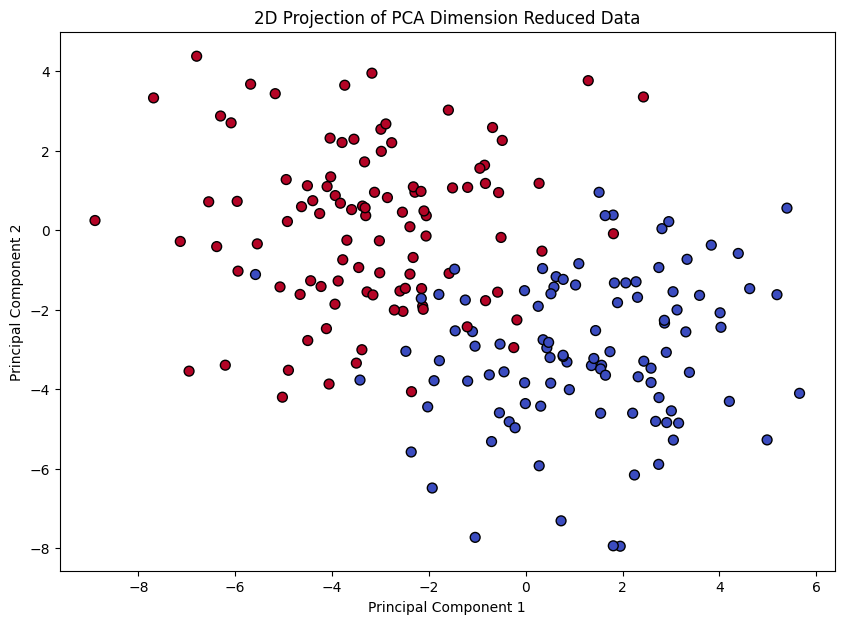

In [2]:
# Create dataset
X, y = make_blobs(n_samples=200, n_features=3, centers=2,
                  cluster_std=2, random_state=0)

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Call the animation function
# create_pca_animation(X, y, pca)

# Plot transformed data
plot_transformed_data(transform_X, y)

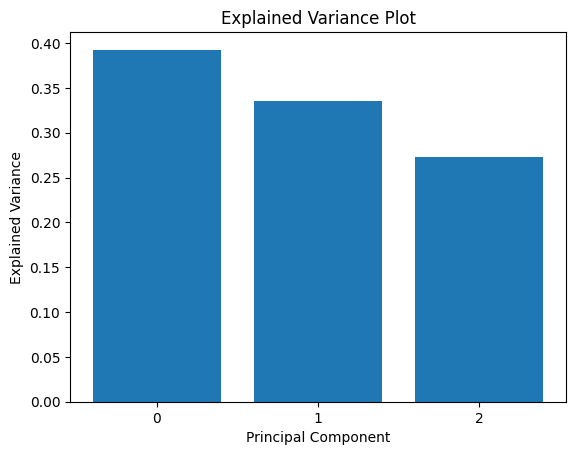

In [3]:
# Plot Explained Variances
explained_variance = pca.explained_variance
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Plot')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.show()

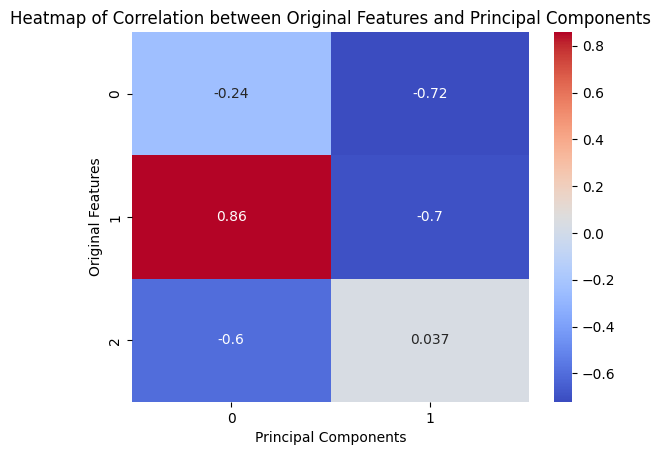

In [4]:
# Initialize the correlation matrix with zeros
correlation_matrix = np.zeros((X.shape[1], transform_X.shape[1]))

# Fill the matrix with computed correlations
for i in range(transform_X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[j, i] = np.corrcoef(X[:, j], transform_X[:, i])[0, 1]

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.title('Heatmap of Correlation between Original Features and Principal Components')
plt.show()

##### 2. Implement Principal Component Analysis on swiss roll data

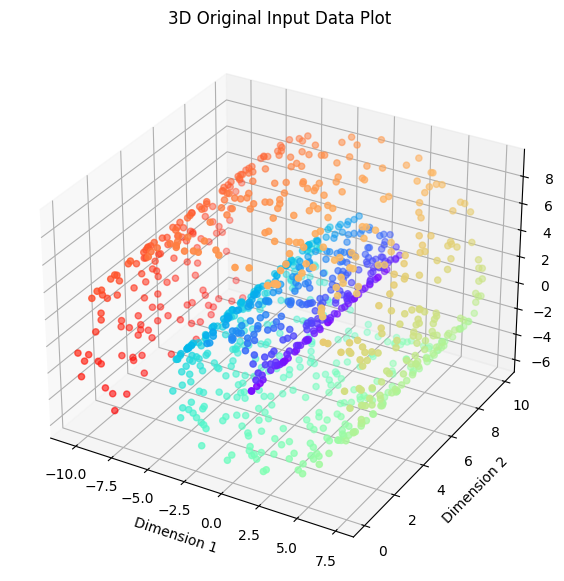

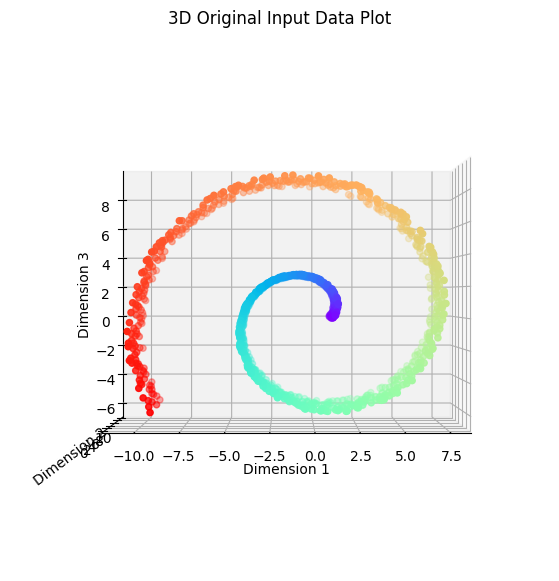

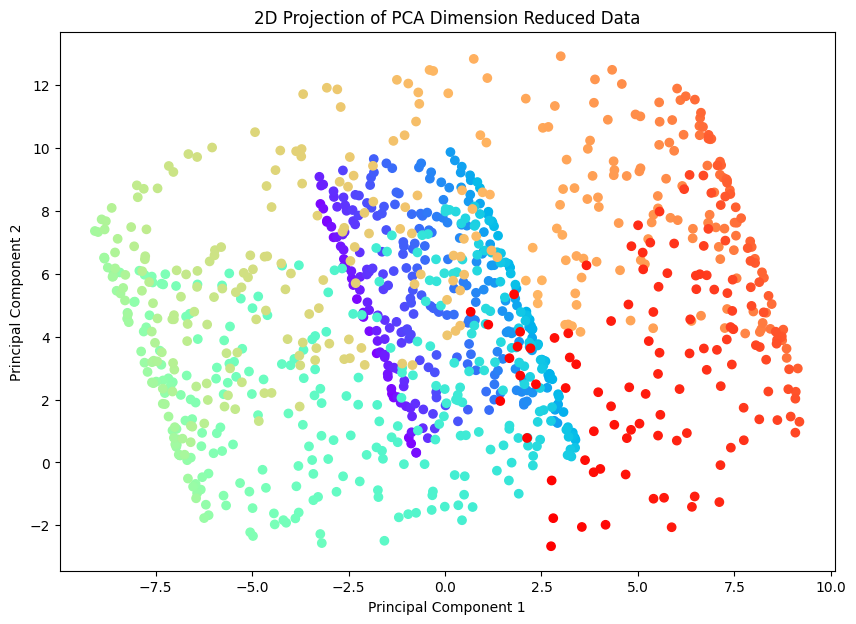

In [5]:
# Create dataset
t = np.arange(0, 10, 0.01)
x0 = np.cos(t) * (t + 1)
x2 = np.sin(t) * (t + 1)
x1 = 10 * np.random.rand(t.shape[0])

X = np.column_stack([x0, x1, x2])

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Plot the original input data in 3D
plot_3d_data(X, y=None, t=t, rotate=False)
plot_3d_data(X, y=None, t=t, rotate=True)

# Plot transformed data
plot_transformed_data(transform_X, y=None, t=t)

##### 3. Implement Principal Component Analysis on arrow shape data

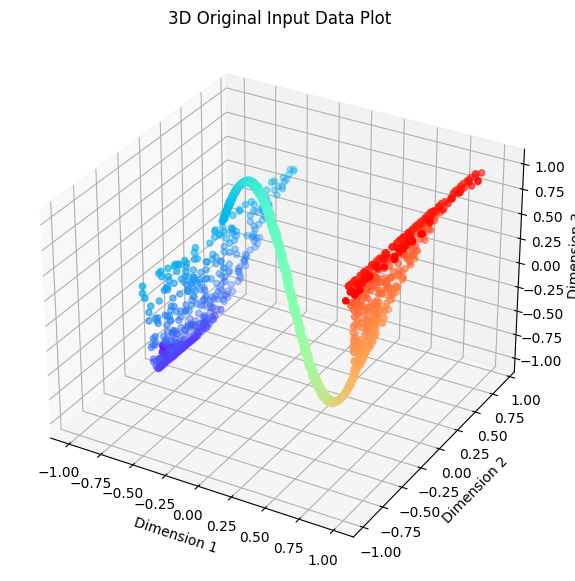

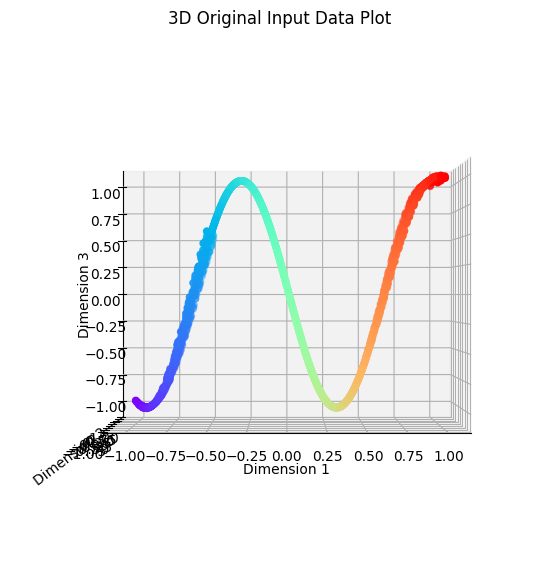

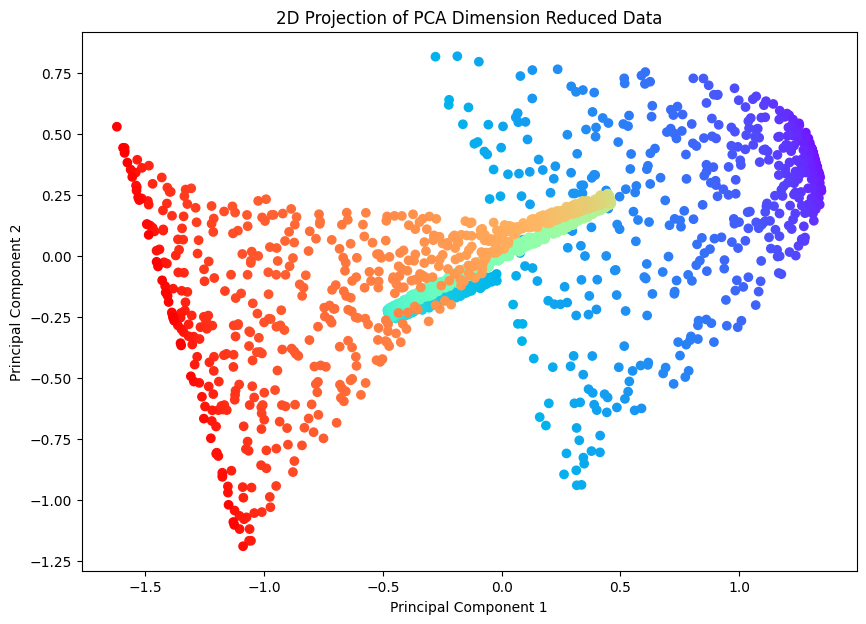

In [6]:
# Create dataset
t = np.arange(-1, 1, 0.001)
x0 = t

# Vectorized computation for x1
mask1 = (t < 0.5) & (t > -0.5)
mask2 = t <= -0.5
mask3 = ~mask1 & ~mask2

x1 = np.zeros_like(t)
x1[mask1] = 0.02 * np.random.uniform(-1, 1, mask1.sum())
x1[mask2] = 2 * (1 + t[mask2]) * np.random.uniform(-1, 1, mask2.sum())
x1[mask3] = 2 * (-0.5 + t[mask3]) * np.random.uniform(-1, 1, mask3.sum())

x2 = np.cos(t*5 + 1.5)

X = np.column_stack([x0, x1, x2])

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Plot the original input data in 3D
plot_3d_data(X, y=None, t=t, rotate=False)
plot_3d_data(X, y=None, t=t, rotate=True)

# Plot transformed data
plot_transformed_data(transform_X, y=None, t=t)

##### 4. Implement Principal Component Analysis on helix shape data

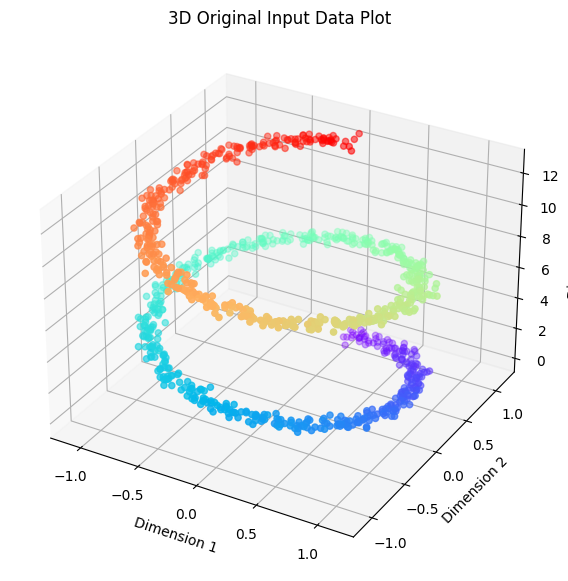

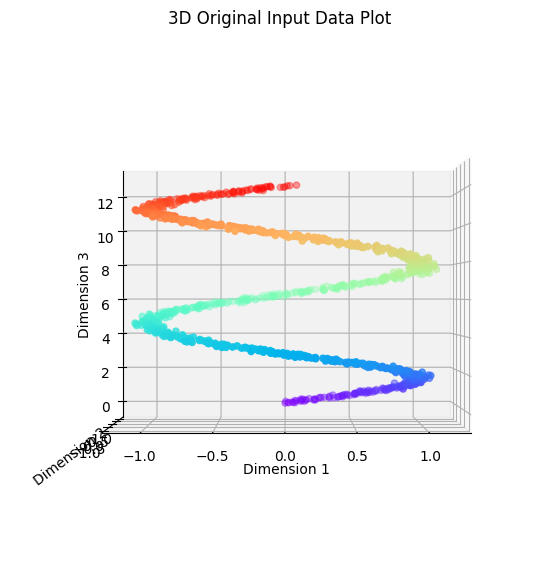

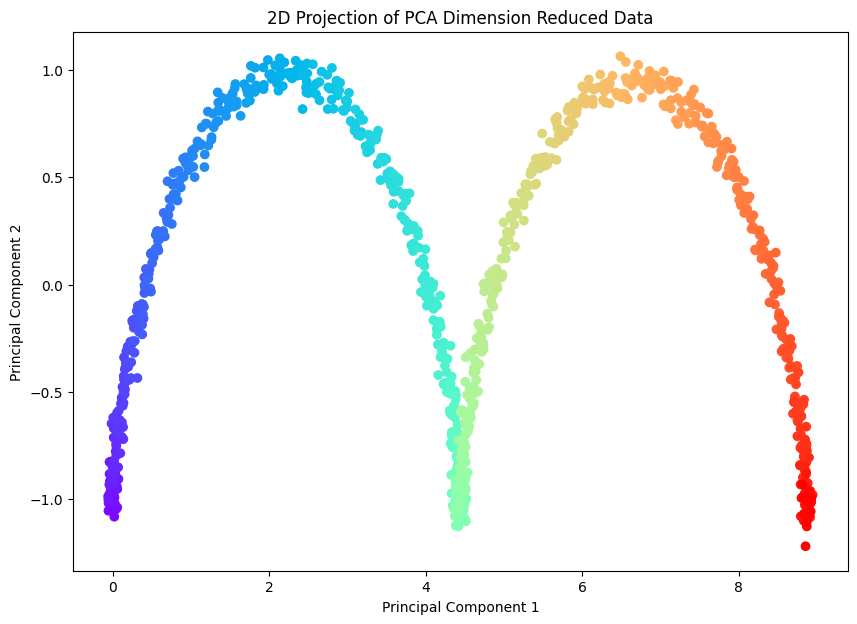

In [7]:
# Create dataset
t = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(t)
y = np.cos(t)
z = t

# Add noise
x += 0.05 * np.random.randn(x.shape[0])
y += 0.05 * np.random.randn(y.shape[0])

X = np.column_stack([x, y, z])

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Plot the original input data in 3D
plot_3d_data(X, y=None, t=t, rotate=False)
plot_3d_data(X, y=None, t=t, rotate=True)

# Plot transformed data
plot_transformed_data(transform_X, y=None, t=t)

##### 5. Implement Principal Component Analysis on twin peaks data

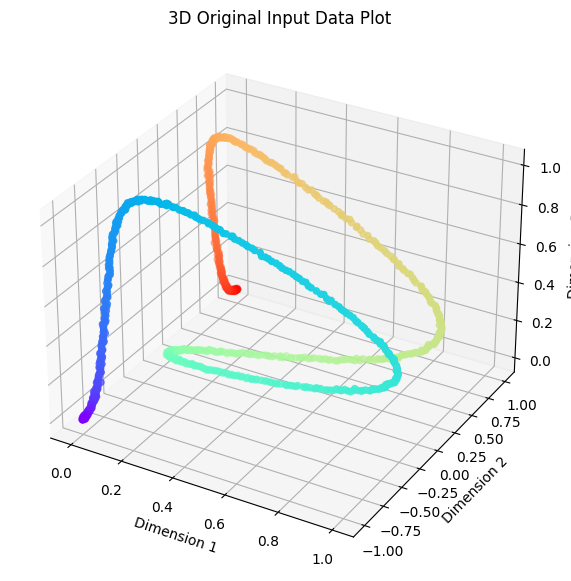

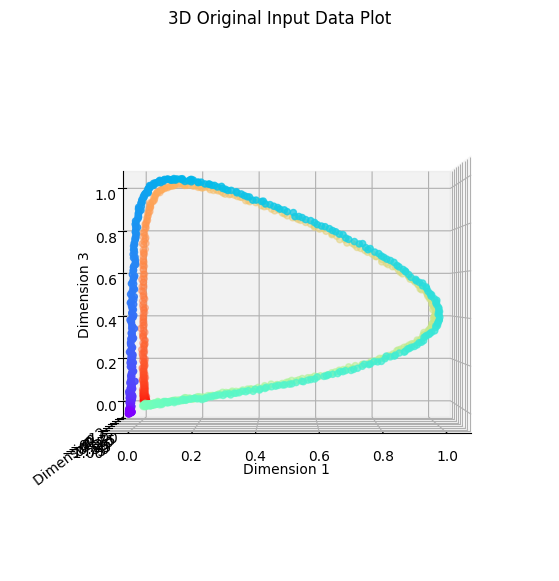

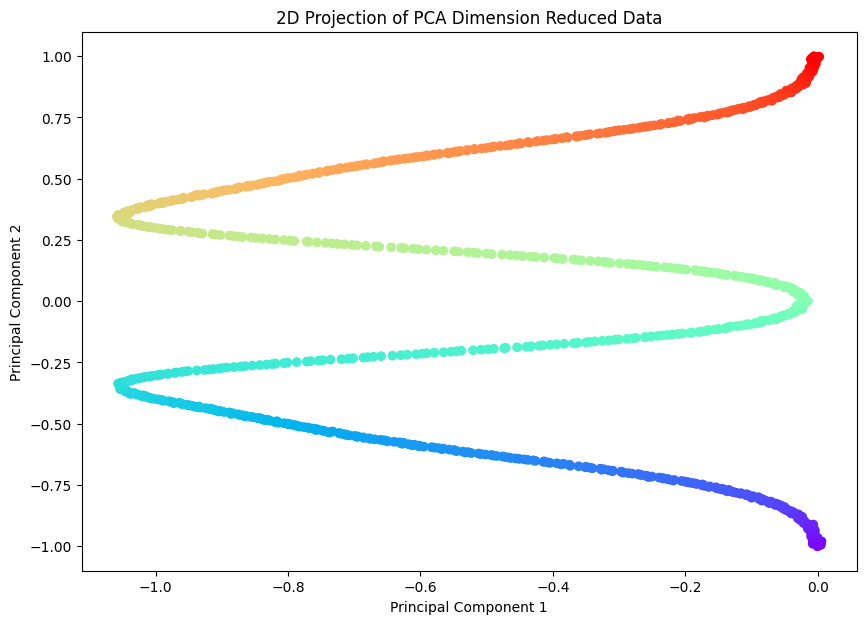

In [8]:
# Create dataset
def generate_peak(t, center, std_dev):
    return np.exp(-(t - center)**2 / (2 * std_dev**2))

t = np.linspace(-1, 1, 1000)
x = generate_peak(t, 0.3, 0.1) + generate_peak(t, -0.3, 0.1)
x += 0.003 * np.random.randn(t.size)
y = t
z = generate_peak(t, 0.5, 0.15) + generate_peak(t, -0.5, 0.15)
z += 0.003 * np.random.randn(t.size)

X = np.column_stack([x, y, z])

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Plot the original input data in 3D
plot_3d_data(X, y=None, t=t, rotate=False)
plot_3d_data(X, y=None, t=t, rotate=True)

# Plot transformed data
plot_transformed_data(transform_X, y=None, t=t)